# Decision Tree Visualization Lesson
## Jeff Hale

## Import graphviz into your conda environment with `conda install python-graphviz`.

## I do: Decision Tree Model Visualization of Breast Cancer Prediction from Biopsy Attributes

### Import the necessary packages

In [433]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from graphviz import Source

### Load the breast cancer data. The dataset ships with scikit-learn.

In [447]:
data = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)

X = pd.DataFrame(X, columns=data.feature_names)
y = pd.DataFrame(y)

### Split into training and test sets, instantiate a tree, and fit and score the model.

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

my_classifier = DecisionTreeClassifier(random_state=34)
my_classifier.fit(X_train, y_train)
my_classifier.score(X_test, y_test)

0.9300699300699301

### Make a graphviz object and display it.

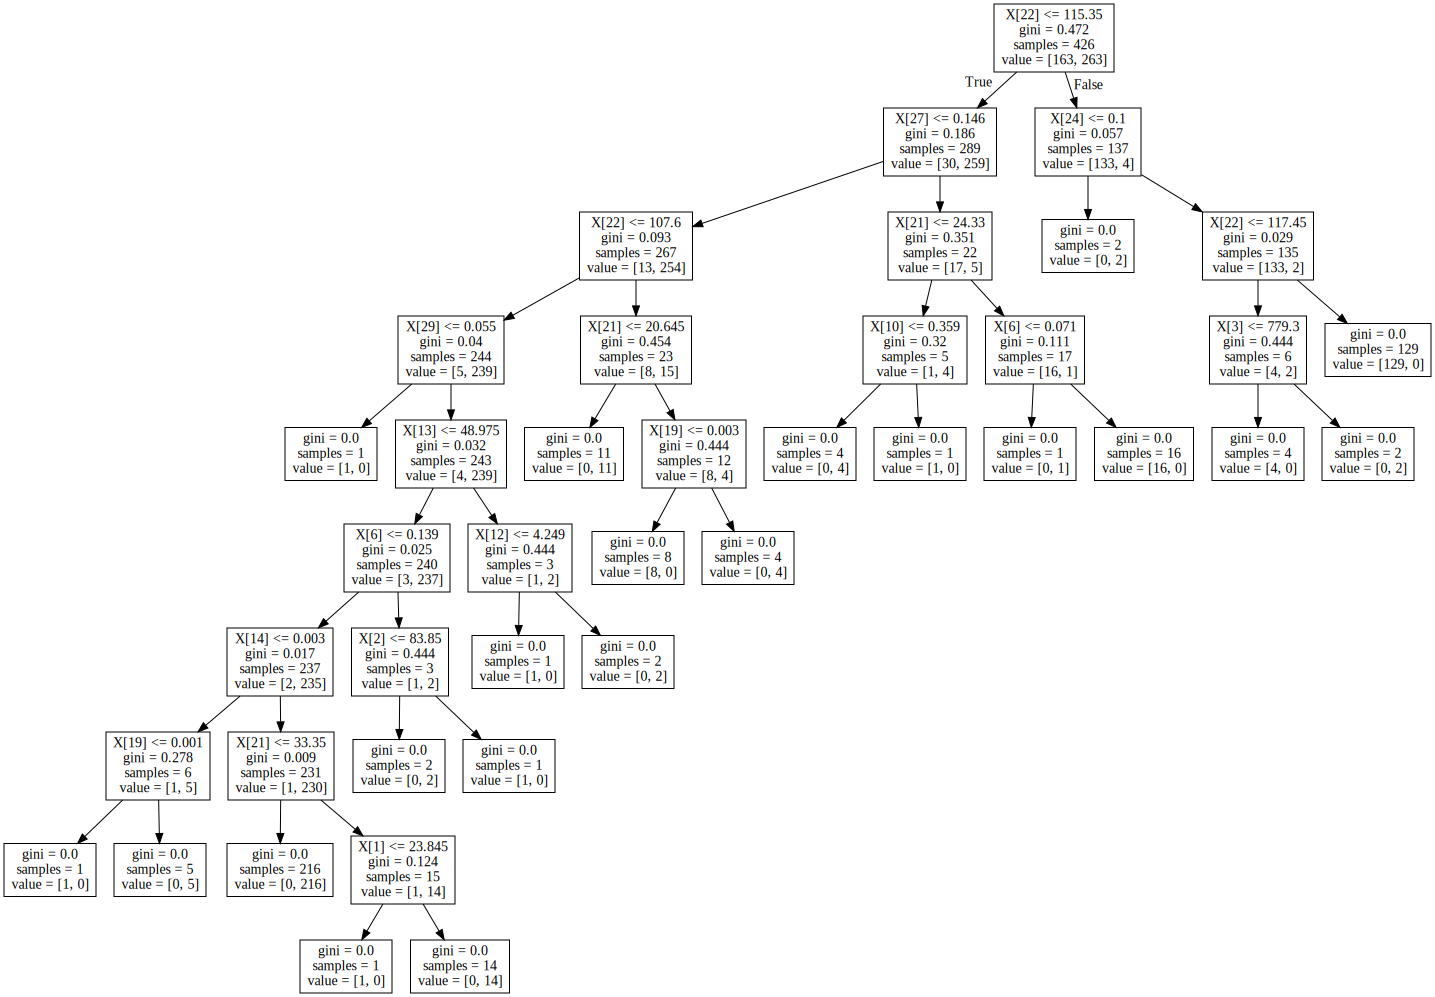

In [465]:
my_graphviz_object = export_graphviz(my_classifier)
    
Source(my_graphviz_object)

### Let's make a less deep tree, with better UX.

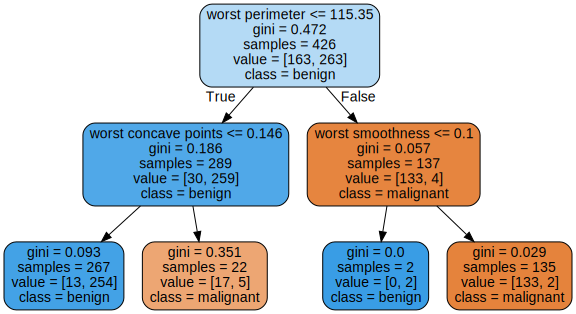

In [462]:
my_classifier = DecisionTreeClassifier(random_state=34, max_depth=2)

my_classifier.fit(X_train, y_train)

my_viz = export_graphviz(
    my_classifier, 
    feature_names=data.feature_names, 
    class_names=data.target_names, 
    filled=True,
    rounded=True
)

Source(my_viz)

### That's better!

# Your Turn: 
## Dangerously Delicous Decision Trees 
You want to predict which type of pie you have based on the weight and the color of the crust. These features are both coded as numbers. 

The outcomes are coded 0 for apple and 1 for peach.

(This is random data and a bit silly, but just go with it - the focus is on making the visualization.)

## Run the following cells.

### Import the necessary packages

In [433]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from graphviz import Source

Load the data into a DataFrame.

In [461]:
df_pie = pd.DataFrame(dict(
    Pie=[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], 
    Color=[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    Weight=[4, 5, 3, 4.5, 6, 3.6, 4.2, 4, 3, 4, 3.5, 3, 3.25, 4.75, 4.3]
))
df_pie.head()

,Pie,Color,Weight
0,1,0,4.0
1,0,0,5.0
2,1,1,3.0
3,0,0,4.5
4,0,0,6.0


Normally you'd do some exploratory analysis, but the focus here is on the visualization, so we'll plow ahead.

### Split into features and outcomes.

In [438]:
X = df_pie.loc[:, "Color":"Weight"]
y = df_pie['Pie']

### Split into training and test sets. 

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)
X_train.head()

,Color,Weight
2,1,3.0
7,1,4.0
11,0,3.0
3,0,4.5
4,0,6.0


### Instantiate a tree classifier object

In [441]:
my_classifier_tree = DecisionTreeClassifier(random_state=34)

### Fit the model

In [442]:
my_classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=34, splitter='best')

# In the cell below, create a visualization of your tree with the classes and features labeled.